# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This  dataset  shows if a patient showed up for an appoimtment or not after the patient had scheduled an appointment with the hospital. the data has the following variabls as columns.

#### Columns
1. PatientID
  * Patient identification number
2. Appointment ID
  * Appointment Identification number
3. Gender
  * Whether the patient is male or female. Women are in greater propotion
4. DataMarcacaoConsulta
  * The day of the appointment 
5. DataAgendamento
  * The day the appointment was mad
6. Age
  * The patient's Age
7. Neighbourhood
  * location of the appointment
8. Scholarship
  * True or False whether a patient has health care or not
9. Hipertension
  * True or False whether a patient has Hypertension
10. Diabetes
  * True or False whether a patient is Diabetic
11. Alcoholism
  * True or False whether a patient is Alcoholic
12. Handcap
  * True or False whether a patient is Handcap
13. SMS_received
  * 1 or more notification messages sent to patient
14. No-show
  * True or False whether thry showed up for the appointment

### Question(s) for Analysis


#### Question 1
Which Neighbourhood has the most no-shows ?
> Will this neighbouhood influence the probablity of a patient not showing up.
#### Question 2
Which age has the most no shows to appointments?
> If a patient is a in certain age range will it influence whether they show up or not.
#### Question 3
Do Patients with a scholarship show up more than those without?
> I expect patients with healthcare to show up more for their appointment than thosae without since they're coverd for expenses.`
#### Question 4
Are patients with pre existing conditons like hipertension, diabetes or handcap more likely to show up for their appointment?
> Patients with medical conditions should attend more of their apppointments since they need regualr caheck up.



In [250]:

#importing libriries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#loading dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')




<a id='wrangling'></a>
## Data Wrangling



In [251]:
# Loading data and print out a few lines. Performing operations to inspect data

df.head(80)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.488942e+11,5597632,F,2016-04-18T17:32:53Z,2016-04-29T00:00:00Z,60,JABOUR,0,0,0,0,0,0,No
76,6.549277e+12,5597643,M,2016-04-18T17:40:18Z,2016-04-29T00:00:00Z,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes
77,5.753721e+12,5642767,F,2016-04-29T17:06:27Z,2016-04-29T00:00:00Z,27,JABOUR,0,0,0,0,0,0,No
78,6.259265e+11,5597672,M,2016-04-18T17:52:49Z,2016-04-29T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No


> viewing the first 80 rows fo the data to ahe look and feel of hoe the columns appear and they contain.

In [252]:
df.shape
#how many rolls and columns are in the dataset

(110527, 14)

### Missing and null Values
The data does not have missing valuse nor null vlues

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Checking for duplicated values

In [254]:
df.PatientId.duplicated().sum()
#from this result we can see that some patients made more than one appointment

48228

In [255]:
#we need to check if the appointmentid has all unique values meaning no double entries
df.AppointmentID.nunique()

110527

#### The AppointmentId column has unique values
>We can use the appoiintment id to investigate the relations between the show and no-show patients



In [256]:
#chacking how many neighbourhoods are in the dataset
df.Neighbourhood.nunique()

81

In [257]:
#checking for unique schedule days 
df.ScheduledDay.nunique()

103549


### Data Cleaning


#### Appointment day descrepancies 
>From the data it seems as if appointments that were made in the same month were all appointed to the same day. Obviously there is an error here in  the data capturing so thats why the AppointmentDay column will be droped.
Schedule Day will also be drooped since every patient that is in this dataset made a booking for an appointment.

In [258]:
df.AppointmentDay.duplicated().sum()

110500

#### Dropping Appointment Day and Schedule day

In [259]:
#dropping the schedule date, appintment date columns 
df.drop(['AppointmentDay', "ScheduledDay"], axis=1, inplace=True)

In [260]:
#inspecting if our drop function worked
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [261]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Reassigning No-show values

In [262]:
#changing No to 0 using a for loop
for z in df.index:
    if df.loc[z, "No-show"] == 'No':
        df.loc[z, 'No-show'] = 0
    
    


In [263]:
df.head(80)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.488942e+11,5597632,F,60,JABOUR,0,0,0,0,0,0,0
76,6.549277e+12,5597643,M,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes
77,5.753721e+12,5642767,F,27,JABOUR,0,0,0,0,0,0,0
78,6.259265e+11,5597672,M,21,MARIA ORTIZ,0,0,0,0,0,1,0


In [264]:
#changing Yes to 1s 
for x in df.index:
    if df.loc[x, "No-show"] == 'Yes':
        df.loc[x, 'No-show'] = 1

We have changed the No-show values to 0 and 1. if it was No it was assigned 0 and a Yes was changed to 1. This was done so that the data type could match the some of the columns with true or false information.

In [265]:
#need to check if no vlaues were lost durig the  reassigning process
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [266]:
#renaming the No-show cloumn 
df.rename(columns = {'No-show' : 'No_show'}, inplace=True)

#### Renaming the No-Show column to No_show

Had to change the data type in the no-show to 0 and 1 (falrse or true). For No we made it 0 and for Yes we changed it to a 1. this is to make the rest of the dat easy to analyse since more columns are true or false.

In [267]:
#checking if our reanme function worked
df.head(80)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.488942e+11,5597632,F,60,JABOUR,0,0,0,0,0,0,0
76,6.549277e+12,5597643,M,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,1
77,5.753721e+12,5642767,F,27,JABOUR,0,0,0,0,0,0,0
78,6.259265e+11,5597672,M,21,MARIA ORTIZ,0,0,0,0,0,1,0


<a id='eda'></a>
## Exploratory Data Analysis






In [268]:
#selecting all the rows that showed up for the appointment
showed_up = df.query('No_show == 0')
showed_up

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [269]:
#selecting all the rows that didn't showed up for the appointment
missed = df.query('No_show == 1')
missed

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,7.336882e+14,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,1
11,7.542951e+12,5620163,M,29,NOVA PALESTINA,0,0,0,0,0,1,1
17,1.479497e+13,5633460,F,40,CONQUISTA,1,0,0,0,0,0,1
20,6.222575e+14,5626083,F,30,NOVA PALESTINA,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,45,BARRO VERMELHO,0,0,0,0,0,0,1
110492,6.456342e+14,5786741,M,33,MARIA ORTIZ,0,1,0,0,0,0,1
110496,8.544295e+13,5779046,F,37,MARIA ORTIZ,0,1,0,0,0,0,1
110515,6.456342e+14,5778621,M,33,MARIA ORTIZ,0,1,0,0,0,0,1


#### New Dataframes
In the two above cell blocks, the No_show cloumn was made into 2 datasets one showing all the patients that made it to the their appointments **showed up**, and one were the patients missed their appointments **missed**

In [270]:

#getting the total number of patients that missed their appointments
tot_mis = missed['No_show'].count()
tot_mis

22319

In [271]:
#total number of patients
tot = df['No_show'].count()
tot

110527

In [272]:
#calculating the percentage of patients that missed their appointments
stats_missed = np.divide(tot_mis, tot)
perc = np.multiply(stats_missed, 100)

print(perc,'%')

20.193255946510806 %


#### Some stats on the data 
We can see that **20.2%** of the patients missed their appointments which means the majority of the data 79.8% attended their appointments. From now on we will be investigating which factors give rise to these numbers

### Exploring the gender column 
We would like to see how the data is distributed beatween males and females. whch gender had the highest number of appointments made and if this will lead to that gender having the most no shows.

In [273]:
df['Gender'] = df.Gender.astype(str)

In [274]:
df.dtypes

PatientId        float64
AppointmentID      int64
Gender            object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No_show           object
dtype: object

In [275]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [276]:
#this is a function that will be used to calulate percentages through out the investigation
# it will take it in the counts of the required variable and the total of that variable as parameters

def percentage(count,total):
    percentages = np.multiply(np.divide(count, total), 100)
   
    return percentages

   
    


In [277]:
#claculating the percentage of men and females that were in the data set 

males = percentage(38687, 110527)
print('Percentage of males', males, '%')

females = percentage(71840, 110527)
print('Percentage of females', females, '%')


Percentage of males 35.00230712857492 %
Percentage of females 64.99769287142509 %


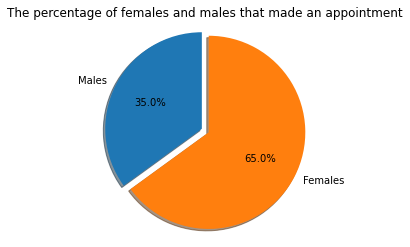

In [278]:
#plotting our findings from the above cell on a pie chart to visualise it using matplotlib
labels = 'Males', 'Females'
sizes =[males,females]
explode = (0, 0.08)

fig1, px1 = plt.subplots()
px1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90 )
px1.axis('equal')
px1.set_title('The percentage of females and males that made an appointment')
plt.show()

> 65% of the appointments made were made by females thats more compared to the 35% made by males.The above chart shows that there were more females that made appountments, which looks like females take better care of their health than men.

In [279]:
#getting the total number of males + females that missed an appointment
missed['Gender'].count()

22319

In [280]:
#getting value counts for feamles and males 
missed['Gender'].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [281]:
#calculating the percentage of men that missed their appointments
males_x = percentage(7725, 110527)
print('Percentage of males that missed their appointments', males_x, '%')
#percentage of females that missed their appointments
females_x = percentage(14594, 110527)
print('Percentage of females that missed their appointments', females_x, '%')

Percentage of males that missed their appointments 6.989242447546753 %
Percentage of females that missed their appointments 13.204013498964054 %


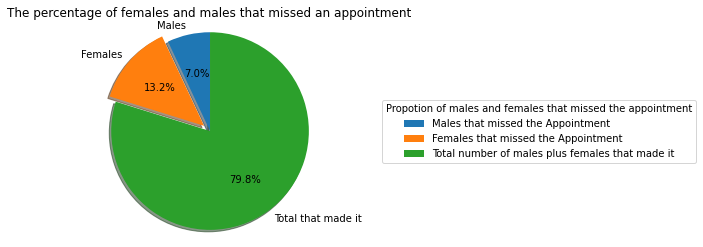

In [282]:
#plotting our findings from the above cell on a pie chart to visualise it using matplotlib

labels = 'Males', 'Females', 'Total that made it'
sizes =[males_x,females_x, 79.807] #79.807 is the percentage of patients that made it to their appointment
explode = (0, 0.08, 0)

fig1, gx1 = plt.subplots()
gx1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90 )
gx1.axis('equal')

gx1.set_title('The percentage of females and males that missed an appointment')

gx1.legend(['Males that missed the Appointment','Females that missed the Appointment', 'Total number of males plus females that made it'],
          title="Propotion of males and females that missed the appointment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

> More women did miss more appointments than men just by a small margin. Considering that 65% of the patients were females, men are likely to miss more appointments than females.

### We need to see how many of the appointments made recieved a message notification


In [283]:
#creating an sms recieved dataset
sms = df.query('SMS_received == 1')
sms.count()

PatientId        35482
AppointmentID    35482
Gender           35482
Age              35482
Neighbourhood    35482
Scholarship      35482
Hipertension     35482
Diabetes         35482
Alcoholism       35482
Handcap          35482
SMS_received     35482
No_show          35482
dtype: int64

In [284]:
#creating a no sms received dataset
no_sms = df.query('SMS_received == 0')
no_sms.count()

PatientId        75045
AppointmentID    75045
Gender           75045
Age              75045
Neighbourhood    75045
Scholarship      75045
Hipertension     75045
Diabetes         75045
Alcoholism       75045
Handcap          75045
SMS_received     75045
No_show          75045
dtype: int64

In [285]:
#calculating the percentage of patients that recieved a notification
notification = percentage( 35482,110527 )
print('Percentage of Patients that recieved an sms notification:', notification,'%')

Percentage of Patients that recieved an sms notification: 32.10256317460892 %


> The number of patients that received an sms is fairly low (32%) to  the number of patients that actually showed up  for their appointments(79.8%). receiving an sms had no great influnce on who up showed for their appointment.

In [286]:
#getting the number of patients that did not receive the sms and did not show up
xx = no_sms.query("No_show==1").count()
xx

PatientId        12535
AppointmentID    12535
Gender           12535
Age              12535
Neighbourhood    12535
Scholarship      12535
Hipertension     12535
Diabetes         12535
Alcoholism       12535
Handcap          12535
SMS_received     12535
No_show          12535
dtype: int64

In [287]:
#calculating the percentage of Percentage of patients that did not receive an sms and did not show up
no_txt = percentage(12535,75045)
print('Percentage of patients that did not receive an sms and did not show up:', no_txt, '%')

Percentage of patients that did not receive an sms and did not show up: 16.703311346525417 %


>The sms_recieved column has minimal influnce on whether a patient shows up for their appointment or not

## Which Neighbourhood has the most no-shows ?


In [288]:
# analysing which town had the most patients
df['Neighbourhood'].value_counts()


JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

> this table idictaes that JARDIM CAMBURI had the most patients

In [289]:
# analysing which town has the most no shows

missed['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

> Cobversely JARDIM CAMBURI had the most no shows

In [290]:
#calculating the percentage of the top 3 town that had no shows
JARDIM_CAMBURI = percentage(1465,7717)
MARIA_ORTIZ  = percentage(1219, 5805)
ITARARÉ = percentage(923, 3514)

print("JARDIM CAMBURI;",JARDIM_CAMBURI,"%")
print('MARIA ORTIZ;', MARIA_ORTIZ, '%')
print("ITARARÉ;",ITARARÉ,'%')

JARDIM CAMBURI; 18.984061163664638 %
MARIA ORTIZ; 20.999138673557276 %
ITARARÉ; 26.26636311895276 %


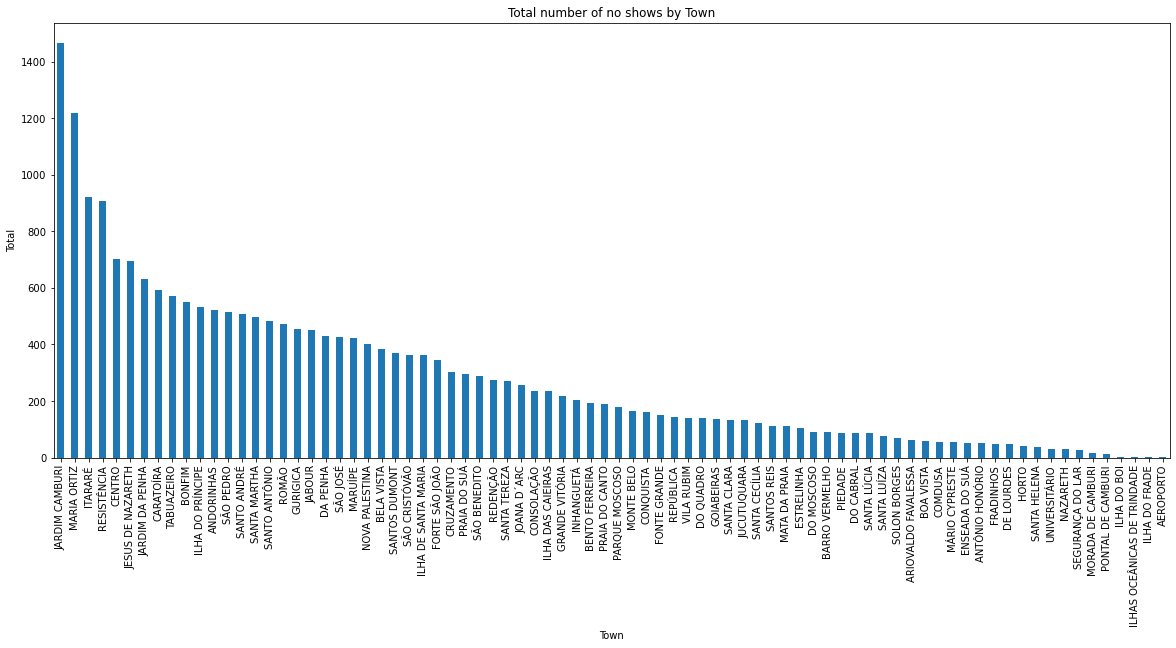

In [291]:
#bar chart to analyse which town has the most no shows
ind = missed['Neighbourhood'].value_counts().index
missed['Neighbourhood'].value_counts()[ind].plot(kind='bar', xlabel = 'Town', ylabel ='Total',title = 'Total number of no shows by Town', figsize=(20, 8));


### Result
>From the analyses we can see that JARDIM CAMBURI had the most no shows but it also had the most number of patients that made an appointment.MARIA ORTIZ and ITARARÉ follwed in 2nd and 3rd respectively with the highest nummber of missed appointments. From this bar chart and analysis ITARARE has the highest percentage of no shows this might influence the out come of a patient showing up or not for their appointment.

### Limitation 
> We do not know how far the towns are from the hospital or point of the appointment therefore we cannot conclude as to why ITARARE has the highest no show. If the distance data was given this would've more insight as to why ITARAE has the highest no shows.

## Which age group has the most no shows ?



In [292]:
#we need to see some of the stats and distribution realted with the age column
df['Age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> From the inforation above right away we can see that there is something with the data like fpr example the minimum age is -1 which is impossible to have a negative integer as an age.

In [293]:
#stats to describe some of the information of the ages 
missed['Age'].describe()


count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [294]:
missed['Age'].value_counts()


0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

> There are too many values that have a zero as the age now we could replace them with the average but that will change the shape of pur data drastically.

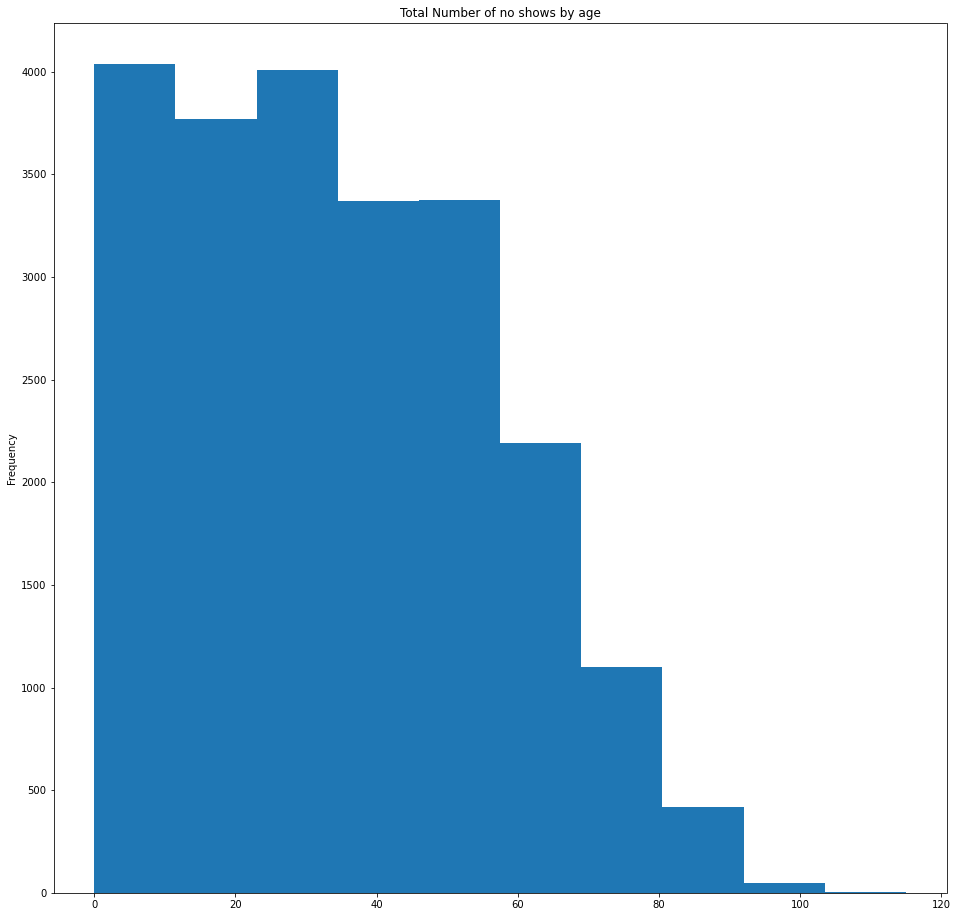

In [295]:
#plotting a histogram to see the distributioon of our data
missed['Age'].plot(kind='hist',  xlabel = 'Age', ylabel ='Total patients',title = 'Total Number of no shows by age' ,figsize=(16, 16));

### Result
>The histogram is skewed to the right
#### Conclusion
>Investigation of the age column showed that the data was skewed to the right meaning that the value of the mode is to the left of the value of the  median. This results in the mean being bigger than the mode and the median.This inicats that most fo the patients that are below the age of the mean which is  35 years rounded up are likely to not make it to the appointment. Although ther is the the issue of too many 0 years old there is some truth in this analyses. older patients are more likely to look ter their helth than young adults who feel they still have a long life ahead of them. ) to 10 years old had the hoghest no shows whilist 40-115 years old more and patients attended their appointments thats why the graph starts decreasing as the age increases. It's an ineverse realtiosip the older the age the less likely a patient is to miss their appointment.
#### Limitation
>The mode of the data was 0 which is definalty an error in the data. This means tht most patients were zero years old, this might have resulted in a fault in the data capturing process. We could not replace these zeros with the avergae because this would change the shape of our data drastically leading to incorrect conclusions.

### Do Patients with a scholarship show up more than those without?


In [296]:
#selecting all the rows that had a scholarshp and showed up
scholar = showed_up.query('Scholarship == 1')
scholar


,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
12,5.666548e+14,5634718,F,22,NOVA PALESTINA,1,0,0,0,0,0,0
18,1.713538e+13,5621836,F,30,NOVA PALESTINA,1,0,0,0,0,1,0
33,7.653517e+12,5616921,F,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,0
37,1.578132e+12,5637986,F,64,TABUAZEIRO,1,1,1,0,0,0,0
60,9.291168e+12,5628739,M,8,NOVA PALESTINA,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110289,2.636517e+14,5759557,M,16,CONQUISTA,1,0,0,0,0,0,0
110382,9.875549e+13,5785156,F,37,RESISTÊNCIA,1,0,0,0,0,0,0
110423,1.751263e+14,5704561,F,34,RESISTÊNCIA,1,0,0,0,0,1,0
110426,9.691376e+09,5740289,M,13,RESISTÊNCIA,1,0,0,0,0,1,0


> This table shows rows of patients that had health care 

In [297]:
scholar.count()

PatientId        8283
AppointmentID    8283
Gender           8283
Age              8283
Neighbourhood    8283
Scholarship      8283
Hipertension     8283
Diabetes         8283
Alcoholism       8283
Handcap          8283
SMS_received     8283
No_show          8283
dtype: int64

In [298]:
#selecting all the rows that had a scholarshp and missed the appointment
scholar_x = missed.query('Scholarship == 1')
scholar_x


,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
17,1.479497e+13,5633460,F,40,CONQUISTA,1,0,0,0,0,0,1
31,3.112849e+11,5628907,M,12,NOVA PALESTINA,1,0,0,0,0,0,1
51,4.694699e+13,5534635,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,1
52,7.987570e+14,5534639,F,23,GRANDE VITÓRIA,1,0,0,0,0,1,1
123,3.673278e+13,5621388,F,31,BELA VISTA,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110238,8.937375e+11,5747054,F,40,JABOUR,1,0,0,0,0,1,1
110351,4.483937e+13,5371807,F,27,RESISTÊNCIA,1,0,0,0,0,1,1
110400,8.382848e+11,5739407,F,36,RESISTÊNCIA,1,0,0,0,0,1,1
110479,4.455244e+12,5638153,F,34,RESISTÊNCIA,1,0,0,0,0,1,1


> this table shows data of patients that had health care but missed their appointments.

In [299]:
#selecting all the rows that had no scholarshp and showed up
no_scholar = showed_up.query('Scholarship == 0')
no_scholar

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,1,0


> this table shows data of patients that had no health care but but showed up to their appointments.

In [300]:
#selecting all the rows that had no scholarshp and missed the appointment

no_scholar_x = missed.query('Scholarship == 0')
no_scholar_x

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,7.336882e+14,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,1
11,7.542951e+12,5620163,M,29,NOVA PALESTINA,0,0,0,0,0,1,1
20,6.222575e+14,5626083,F,30,NOVA PALESTINA,0,0,0,0,0,0,1
21,1.215484e+13,5628338,F,4,CONQUISTA,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,45,BARRO VERMELHO,0,0,0,0,0,0,1
110492,6.456342e+14,5786741,M,33,MARIA ORTIZ,0,1,0,0,0,0,1
110496,8.544295e+13,5779046,F,37,MARIA ORTIZ,0,1,0,0,0,0,1
110515,6.456342e+14,5778621,M,33,MARIA ORTIZ,0,1,0,0,0,0,1


> this table shows data of patients that had no health care and missed their appointments.

In [301]:
#getting information about patients with a health care and those without to  plot on a bar graph
health_care = scholar['No_show'].count()
no_health_care = no_scholar['No_show'].count()

health_care_x = scholar_x['No_show'].count()
no_health_care_x = no_scholar_x['No_show'].count()

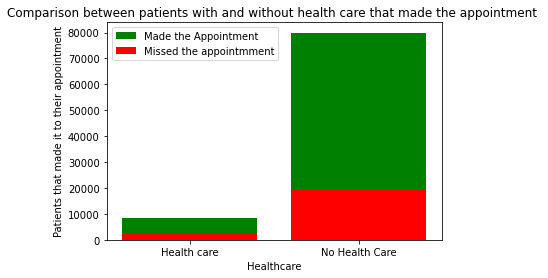

In [302]:
#plotting the bar graph of poeple with scholars and without scholars
locations = [1, 2]

heights = [health_care, no_health_care]
heights_x = [health_care_x, no_health_care_x]

labels = ["Health care", "No Health Care"]
labels_x = ["Health care", "No Health Care"]

plt.bar(locations, heights, color='g', tick_label=labels)

plt.bar(locations, heights_x, color='r', tick_label=labels_x)

plt.title("Comparison between patients with and without health care that made the appointment ")
plt.xlabel("Healthcare")
plt.ylabel('Patients that made it to their appointment');
plt.legend(["Made the Appointment", "Missed the appointmment"]);

### Result
> A small number of patients had healthcare this number was below ten thousand but of those that had health care most of them showed up for their appointment.
### Conclusion
> Very few patients had health care the number is so small that we cannot draw any conclusive insights form this small number. But from the small number we have it is clear that if a patient has heakth care they are more likely to show for an appointmnet than those who are paying out of their own pockets. if more data was available about patients with health care we could've seen a cleareer relationship between how many of those with health care showed up and how many did not. A lot of conditons  were attached to this health caremlike families had to ensure that their childrn attend school and get vaccinated probably most families had no helath care beacuse they faile to meet this criteria resulting in their health care being suspended.
### Limitations
> Very few data to work with to derive any type of conclusions if ant=ything more patients need helathcare.

### Are patients with pre existing conditons like hipertension, handcap or diabetes more likely to show up for their appointment?

### Hipertension

In [303]:
#getting the counts and totals we are goin to use for calculating percentages
hptnsn_tot = df.query('Hipertension == 1')['Hipertension'].count()
print('Total number of patients with Hipertension:',hptnsn_tot)

hipertension = showed_up.query('Hipertension == 1')['Hipertension'].count()
print('Total number of patients with Hipertension that showed up:',hipertension)

hipertension_x = missed.query('Hipertension == 1')['Hipertension'].count()
print('Total number of patients with Hipertension that did not showe up:',hipertension_x)




Total number of patients with Hipertension: 21801
Total number of patients with Hipertension that showed up: 18029
Total number of patients with Hipertension that did not showe up: 3772


In [304]:
#getting the percenatges of patients with Hipertension and how many of those showed up

Hiper_percent = percentage(18029,21801)
Hiper_x_percent = percentage(3772,21801)

print('Percentage of Patients with Hipertention that showed up:',Hiper_percent,'%') 

print('Percentage of Patients with Hipertention that did not showed up:',Hiper_x_percent,'%') 

Percentage of Patients with Hipertention that showed up: 82.69804137424889 %
Percentage of Patients with Hipertention that did not showed up: 17.301958625751112 %


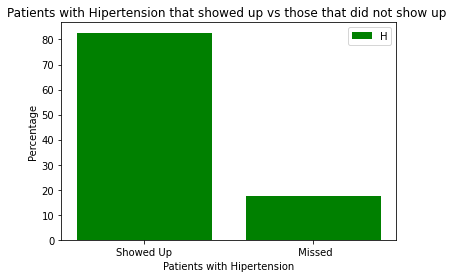

In [305]:
#bar graph to show the comparison between Hipertension an non Hipertension patients that didnt show up

locations = [1, 2]

heights = [Hiper_percent, Hiper_x_percent]


labels = ["Showed Up", " Missed"]


plt.bar(locations, heights, color='g', tick_label=labels)
plt.title("Patients with Hipertension that showed up vs those that did not show up ")
plt.xlabel("Patients with Hipertension")
plt.ylabel('Percentage');
plt.legend('Hipertension');

> This bar graph shows the percentage of patients that had hipertension that showed up to their appointmeants and the percentage of those with hipertwnsion that did not show up.

### Diabetes

In [306]:
#getting the counts and totals we are goin to use for calculating percentages
diabetes_tot = df.query('Diabetes == 1')['Diabetes'].count()
print('Total number of patients with Diabetes:',diabetes_tot)

diabetes = showed_up.query('Diabetes == 1')['Diabetes'].count()
print('Total number of patients with Diabetes that showed up:',diabetes)

diabetes_x = missed.query('Diabetes == 1')['Diabetes'].count()
print('Total number of patients with Diabetes that did not showe up:',diabetes_x)

Total number of patients with Diabetes: 7943
Total number of patients with Diabetes that showed up: 6513
Total number of patients with Diabetes that did not showe up: 1430


In [307]:
#getting the percenatges of patients with Diabetes and how many of those showed up and didn't show up

dibetic_percent = percentage(6513,7943)
diabetic_x_percent = percentage(1430,7943)

print('Percentage of Patients with Diabetes that showed up:',dibetic_percent,'%') 

print('Percentage of Patients with Diabetes that did not showed up:',diabetic_x_percent,'%')

Percentage of Patients with Diabetes that showed up: 81.99672667757774 %
Percentage of Patients with Diabetes that did not showed up: 18.00327332242226 %


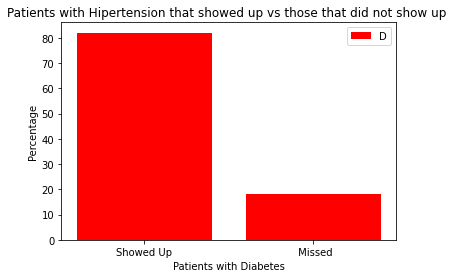

In [308]:
#bar graph to show the comparison between Diabetic and Non Diabetic patients that didnt show up


locations = [1, 2]

heights = [dibetic_percent, diabetic_x_percent]


labels = ["Showed Up", " Missed"]


plt.bar(locations, heights, color='r', tick_label=labels)
plt.title("Patients with Hipertension that showed up vs those that did not show up ")
plt.xlabel("Patients with Diabetes")
plt.ylabel('Percentage');
plt.legend('Diabetic');

> The bar graph shows the percentage of patients that have diabetes that showed up to their appointmeants and the percentage of those with biabetes that did not show up.

### Handcap

In [309]:
#getting the counts and totals we are goin to use for calculating percentages
handcap_tot = df.query('Handcap == 1')['Handcap'].count()
print('Total number of handcap patients :',handcap_tot)

handcap = showed_up.query('Handcap == 1')['Handcap'].count()
print('Total number of handcap patients :',handcap)

handcap_x = missed.query('Handcap == 1')['Handcap'].count()
print('Total number of handcap patients that did not show up:',handcap_x)

Total number of handcap patients : 2042
Total number of handcap patients : 1676
Total number of handcap patients that did not show up: 366


In [310]:
#getting the percenatges of patients who are handcap and how many of those showed up and didn't show up

handcap_percent = percentage(1676,2042)
print('Percentage of Handcap  that showed up:',handcap_percent,'%') 

handcap_x_percent = percentage(366,2042)
print('Percentage of Handcap Patients  that did not showed up:',handcap_x_percent,'%')

Percentage of Handcap  that showed up: 82.07639569049951 %
Percentage of Handcap Patients  that did not showed up: 17.92360430950049 %


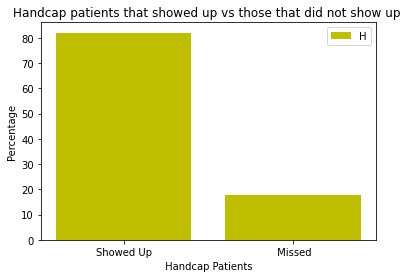

In [311]:
#bar graph to show the comparison between handcap an abled patients that didnt show up


locations = [1, 2]

heights = [handcap_percent, handcap_x_percent]


labels = ["Showed Up", " Missed"]


plt.bar(locations, heights, color='y', tick_label=labels)
plt.title("Handcap patients that showed up vs those that did not show up ")
plt.xlabel(" Handcap Patients ")
plt.ylabel('Percentage');
plt.legend('Handcap');

The bar graph shows the percentage of handcap patients  that showed up to their appointmeants and the percentage of those that did not show up.

<a id='conclusions'></a>
### Result
> Most patients that had a diagnosis in diabetis, hipertension and those that were handcap showed up to their appointments more than those that had no diagnosis. this is what we expected because these are the patients that need regular medical check ups.

# Conclusions
> From the results of the analysis performed on our questions fromt the following can be concluded, if a patient made an appointment and was from JARDIM CAMBURI they had a 18.98% chance of not showing up, if from MARIA ORTIZ they had  a 21% percent and finaly if they were from the tow of of ITARARÉ they had a 26.2% chance of missing their appointment. These 3 towns had the highest percenatge of no shows of all the towns included in the dataset.

> if a patient was below the age of 34 years they most likely to miss their appointment because the bar graph was right skewd meaning that most of the no show ages were less than the mean age which 34,3 years, 35 years if rounded up. Also bearing in mind that the mode (the age that appeared the most) was zero years old menas that the result we obtaioned has a sigificant error since it impossible to have those many patients at the age of zero years.

> A few patients  had  healh care,  the reasons for this were disucssed undr the analysis of the health care data wich showed that a small percentage of the patients were under health care the time this data was recorded. The resluts that were drawn from thos small data idicated that if a patient had thelath care they are more likely to show up for theri appointment.

> As expected from the insights that were drawn from the visualisations the percentage of patients that had a medical conditon that showed up to appointments was way higher than the patients ho had no diagnosis. From the medical conditios analysed Diabetic patients had the highest no show with 18%. 

> To sum it all up is a patient is Male below the age of 35, is from the neighbourhood of Itarare, has no health care and is diabetic, they are likely to miss their appointments. 



## Limitations
>The data had a few data points to get valid reliable insights and there were errors mentioned above with some of the data capturing process. A good sample size would've been five hundred thousand to a million Appointment IDs. If the appointment day was also accurate we would've investigated whether weedays or weekends had more no shows. 


### References
> https://www.w3schools.com/python/numpy/numpy_ufunc_simple_arithmetic.asp
> https://www.w3schools.com/python/pandas/pandas_cleaning_wrong_data.asp
> https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html